# Ceny avokáda v USA
##### Hugo Hrbáň
Dáta o cenách avokáda v USA. Dáta sú získané z https://www.kaggle.com/datasets/neuromusic/avocado-prices. Pre každý týždeň v rokoch 2015 - 2018 obsahujú dáta záznam o tom, aké množstvo avokád a za akú cenu sa predávalo v danom regióne.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

Načítanie dát

In [2]:
avocados = pd.read_csv('avocado.csv', sep=',')

Dostupné údaje v tabuľke

In [3]:
avocados.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Histogram cien za celé obdobie vo všetkých regiónoch

array([[<Axes: title={'center': 'AveragePrice'}>]], dtype=object)

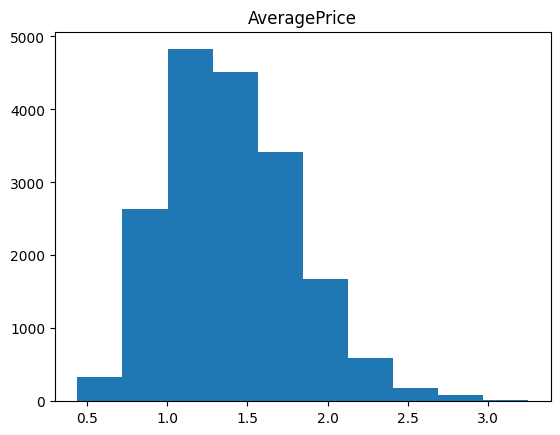

In [4]:
avocados.hist(column='AveragePrice', bins=10, grid=False)

Kalifornia je najdrahší štát v USA, ale zároveň je aj najväčším producentom avokád. Zaujíma ma teda, či sú ceny v priemere vyššie alebo nižšie než celkový proemer. Nulová hypotéza bude: "Ceny avokád v Kalifornii sú rovnaké ako v celých USA." Alternatívna hypotéza bude: "Ceny avokád v Kalifornii sú vyššie ako v celých USA.". Riešime úlohu intervalového odhadu priemeru.

Využijeme one-sample t-test z prednášky. Najprv si rozdelíme dáta na dve skupiny: ceny avokád v Kalifornii a ceny avokád v celých USA. Ako hladinu významnosti si zvolíme 5%.

In [5]:
mean_global = avocados['AveragePrice'].mean()

# skúmaná náhodná veličina
_mean_price_california = avocados.where(avocados["region"] == \
                        "California")["AveragePrice"].dropna()

alpha = 0.05

N = _mean_price_california.count()
std = _mean_price_california.std()
t_a2 = scipy.stats.t.ppf(1 - alpha / 2, df=N - 1)
    # = psi^-1( 1 - alpha / 2 )

Z = (_mean_price_california - mean_global) / (std / np.sqrt(N))
print("Počet príkladov:", N)

Počet príkladov: 338


Síce nevieme presnú hodnotu smerodatnej odchylky, ale vďaka tomu, že počet príkladov N je dostatočne veľký, tak sa odvoláme na CLV a tvridíme, že Z konverguje v distribúcii k N(0,1) za predpokladu, že platí nulová hypotéza.

Teraz skontrolujeme, či je realizácia náhodnej veličiny Z v požadovanom intervale. Meraná štatistika náhodnej veličiny Z je jej priemer.

In [6]:
realisation = Z.mean()
print("t_a2 = ", t_a2)
print("Z = ", realisation)
print("Nulová hypotéza prijatá 👍" if abs(realisation) < t_a2 \
       else "Nulová hypotéza zamietnutá 👎")

t_a2 =  1.9670282846690172
Z =  -0.5014870086069386
Nulová hypotéza prijatá 👍


S pravdepodobnosťou 1 - alpha = 95% sme správne odhadli, že Z leží v danom intervale.  

Vizualizácia:

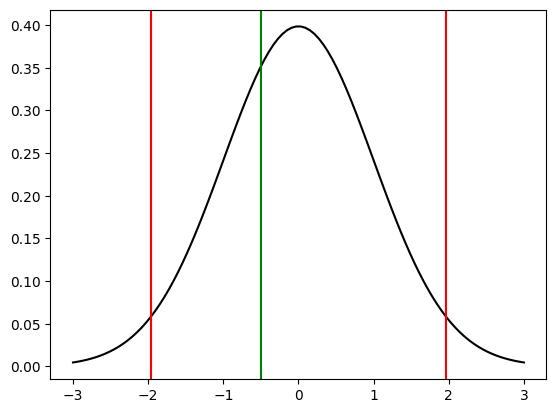

In [7]:
x = np.linspace(-3, 3, 100)
plt.plot(x, scipy.stats.t(df=N - 1).pdf(x), color='black')
plt.axvline(t_a2, color='red')
plt.axvline(-t_a2, color='red')
plt.axvline(realisation, color='green')

Vidíme, môžeme prijať nulovú hypotézu, takže ceny avokád v Kalifornii nie sú vyššie ako v celých USA.